In [1]:
import os, pandas as pd, matplotlib.pyplot as plt, numpy as np, sklearn

In [6]:
files = os.listdir()
all_data = {}
i = 0
for f in files:
    if f.startswith("data") and f.endswith("2021.csv"):
        all_data[i] = pd.read_csv(f)
        i += 1

In [9]:
len(all_data)

12

In [10]:
total_data = pd.DataFrame()
for i in all_data:
    temp = all_data[i].columns
    total_data = total_data.append(all_data[i])

<AxesSubplot:xlabel='jenis,bulan'>

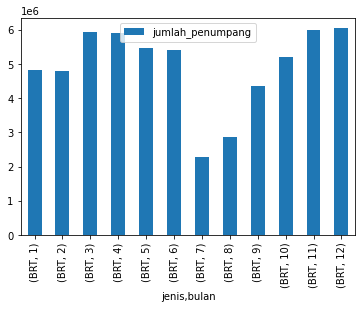

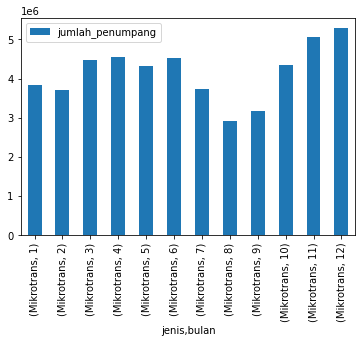

In [13]:
# total_data[total_data.jenis == 'Angkutan Umum Integrasi'].groupby(by = ['jenis', 'bulan'])['jumlah_penumpang'].sum().to_frame().plot.bar()
total_data[total_data.jenis == 'BRT'].groupby(by = ['jenis', 'bulan'])['jumlah_penumpang'].sum().to_frame().plot.bar()
total_data[total_data.jenis == 'Mikrotrans'].groupby(by = ['jenis', 'bulan'])['jumlah_penumpang'].sum().to_frame().plot.bar()

In [14]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing, SimpleExpSmoothing, Holt

In [16]:
train_dict = {
    "BRT": total_data[total_data.jenis == 'BRT'].groupby(by = ['bulan'])['jumlah_penumpang'].sum().to_frame(),
    "mikrotrans": total_data[total_data.jenis == 'Mikrotrans'].groupby(by = ['bulan'])['jumlah_penumpang'].sum().to_frame()
}

In [17]:
models_holt = {}
for k, v in train_dict.items():
    models_holt[k] = Holt(np.asarray(v['jumlah_penumpang'])).fit()

/root/anaconda3/envs/sivan/lib/python3.8/site-packages/statsmodels/tsa/holtwinters/model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/root/anaconda3/envs/sivan/lib/python3.8/site-packages/statsmodels/tsa/holtwinters/model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


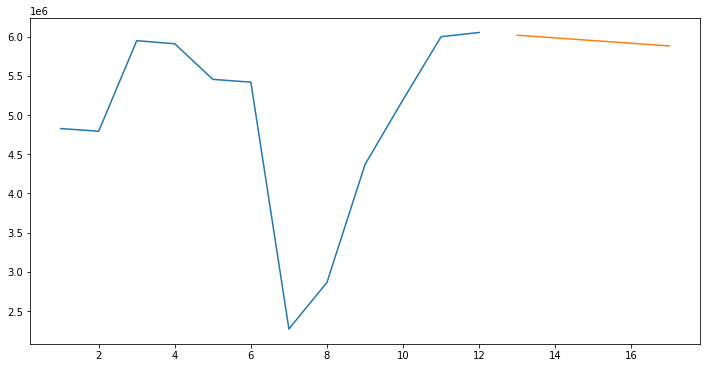

In [19]:
jenis = 'BRT'
pred = pd.Series(models_holt[jenis].forecast(5))
pred.index = [13, 14, 15, 16, 17]

fig, ax = plt.subplots(figsize=(12,6))
ax.plot(train_dict[jenis].index, train_dict[jenis].values)
ax.plot(pred.index, pred.values)

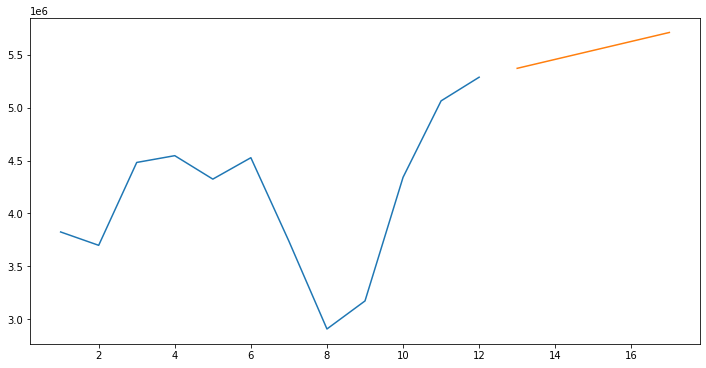

In [21]:
jenis = 'mikrotrans'
pred = pd.Series(models_holt[jenis].forecast(5))
pred.index = [13, 14, 15, 16, 17]

fig, ax = plt.subplots(figsize=(12,6))
ax.plot(train_dict[jenis].index, train_dict[jenis].values)
ax.plot(pred.index, pred.values)